# Climate classifications

Aims of this notebook:

- understand the main ways to classify the land surface by climate and/or vegetation
- create your own classification using `xr.where`
- understand data masking ub xarray using `.where`
- understand the `dayofyear` axis
- apply the functions `.max` and `.idxmax` to find maxima and their indices in the data
- practice data manipulation with `.groupby`,  etc.

Climate classifications are a way of grouping different areas of the world based on their climate, or the average weather conditions, in a particular region over a long period of time. Climate classes are used in many fields, including agriculture, forestry and urban planning, to help understand the unique weather patterns and natural resources of an area and how they may affect human activities.

There are many different ways to classify climate, but one of the most widely used systems is the Köppen-Geiger climate classification system developed in the late 1800s by German climatologist Wladimir Köppen (see https://koeppen-geiger.vu-wien.ac.at/present.htm. for background also https://www.britannica.com/science/Koppen-climate-classification). The Köppen-Geiger system divides climates into five main groups: tropical, arid, temperate, continental and polar. Within each of these groups there are sub-categories based on specific temperature and precipitation patterns.
Climate classes are useful because they provide a standardised way of comparing and understanding the climate/weather patterns of different regions. They allow us to identify areas with similar climates and make informed decisions about how best to use and manage natural resources in those regions. For example, a farmer in a tropical climate may need to consider different crops and irrigation strategies than a farmer in an arid climate. Similarly, an urban planner designing a city in a temperate climate may need to consider different building materials and energy efficiency measures than a planner in a polar climate.

<img src=https://koeppen-geiger.vu-wien.ac.at/pics/map.jpg width="700"/> Source: https://koeppen-geiger.vu-wien.ac.at/

## Classification from vegetation information

The Earth's surface can also be classified into regions with different characteristics by taking into account information on plants and ecosystems present in different areas (introductory summary e.g. here: https://www.climate.gov/maps-data/climate-data-primer/how-do-scientists-classify-different-types-climate). These classifications result for example in regional biomes (https://en.wikipedia.org/wiki/Biome) or ecoregions (e.g. [Olson et al., 2001](https://academic.oup.com/bioscience/article-abstract/51/11/933/227116?redirectedFrom=fulltext), see a map here: https://ecoregions.appspot.com/). Climate and vegetation distribution are closely linked, since climate sets the limits for which types of vegetation can naturally occur. So you can observe many similarities between the two maps.

<img src=https://upload.wikimedia.org/wikipedia/commons/e/e4/Vegetation.png width="700"/> Source: https://en.wikipedia.org/wiki/Biome

Further details in the lecture, and in Gordon Bonan - Ecological Climatology, Chapters (1,2,)6,24: https://www.cambridge.org/core/books/ecological-climatology/D146443B007985BC366B2512345692C0

In the following exercise, we want to create a simple classification of the Earth surface based on information of both climate and vegetation.


## Exercise: Climate classification based on climate and vegetation
Gross primary productivity (GPP) is the rate at which plants produce organic matter through photosynthesis. It is an important measure of the health and productivity of an ecosystem and is often used to understand how different climate conditions affect plant growth and productivity. 

One way in which GPP can be used to create climate classes is by looking at the relationship between GPP and temperature. In general, plants tend to have higher GPP at warmer temperatures because they are able to photosynthesize more efficiently at higher temperatures. However, there is a point at which temperatures become too high and plants begin to experience stress, leading to a decrease in GPP. By analysing the relationship between GPP and temperature in different regions, it is possible to identify areas with similar such GPP-climate relationship and group them into different climate classes.
Analogously, GPP can be used to create climate classes by looking at the relationship between GPP and precipitation. In general, plants tend to have higher GPP in areas with adequate water availability, as water is necessary for photosynthesis and plant growth. By analysing the relationship between GPP and precipitation in different regions, it is possible to identify areas with similar such GPP-climate relationship and group them into different climate classes.

A simple approximation to distinguish these climatic conditions is by looking at the timing of maximum GPP together with temperature and precipitation: At the time of highest productivity (= maximum GPP) during a year, are temperature and precipitation higher or lower than their annual mean?). So we want to classify the land surface by how climate is related to GPP: Over the the yearly cycle (mean seasonal cycle), is GPP highest in a month with high temperature (for example in Germany, in summer)? Or is GPP highest at a month with lower than average temperature (for example in Spain, in fall and winter)? We can use this as a rough estimation to understand if in that area, temperature is above or below the optimum for plant growth. We can ask the same questions for soil moisture to find out if the moisture in that area is above or below optimum for plant growth.

**TODO: Produce a map of climate classes based on GPP. The classes should be assigned according to energy and water availability (whether temperature and soil moisture at the time of maximum GPP are higher or lower than the annual mean for that location). Temperature and soil moisture are interpreted as the driving climate factors as they set the energy and water limits.**

**Therefore, determine their mean seasonal cycles (MSC) of each location. Pick the day of the year in which GPP MSC is at its maximum. Prepare a classification of 4 classes according to energy and water availability: are temperature MSC and soil moisture MSC higher or lower than their average at the timing of maximum GPP at this location?**

So the four classes we will define are: 
- higher than average temperature & higher than average soil moisture at maximum GPP
- higher than average temperature & lower than average soil moisture at maximum GPP
- lower than average temperature & higher than average soil moisture at maximum GPP
- lower than average temperature & lower than average soil moisture at maximum GPP



_Additional hints:_  
You can program the task according to your own ideas or follow the steps below.

1. Calculate the mean seasonal cycle (MSC) of GPP, temperature and soil moisture at each pixel (`.groupby('time.dayofyear').mean(skipna=True)`). You can plot the MSCs for one or two example pixels to get an idea of the data. Check the dataset coordinates `.coords` to understand the new `dayofyear` axis (the time steps are dt=8days or 16 days, so the year has 46 or 23 values of DOYs, depending on the cube used).
2. Find the maximum GPP value in the MSC at each pixel, and plot a map with these maximal GPP values (check e.g. the `.max()` function)
3. Find out the day of year (DOY) of maximum GPP at each pixel (check `.idxmax()` function). This is your mask to determine temperature and soil moisture at DOY of maximum GPP (it has the same set of values as the `dayofyear` axis, so you can use it to filter). Plot a map of DOY of maximum GPP to check out the data.
5. For mean annual temperature and mean annual soil moisture, find their values at DOY of maximum GPP (use e.g. `x.where(x['dayofyear'] == mask)` to mask all data except the corresponding value at DOY of maximum GPP, where `x` is your xarray). It helps to look at a timeseries at one pixel to understand what is happening. You then need to aggregate by `.max('dayofyear', skipna=True)` to only retain the one value which is not masked to NaN at each pixel (dropping the dayofyear axis, so you now have a map with lan/lon dimensions only).
6. Determine if these values are larger/smaller than the average temperature and soil moisture at each pixel. (You can calculate their averages from the MSC cubes from step 1 with `.mean()`, to lower computation cost)
7. Create a classification over these maps according to the difference between temperature at DOY of maximum GPP to average temperature, as well as and soil moisture at DOY of maximum GPP to average soil moisture (use e.g. `xr.where()`:(https://xarray.pydata.org/en/v0.8.2/generated/xarray.Dataset.where.html))

`xr.where()` has a slightly difficult syntax so here is an example of the code structure, where `a,b,c,d` are placeholders of your datasets:

```
xr.where((a > b) & (c > d), 1, # condition 1: pixels where a>b and c>d will be marked with number 1 in the output array
    xr.where((a < b) & (c < e), 2, # condition 2
    xr.where((a > b) & (c < d), 3, # condition 3
    xr.where((a < b) & (c > d), 4, # condition 4
    xr.full_like(2d_map_xarray, np.nan))))) # fill rest of array with NaN at the pixels with no values, use any of your xarrays with lat/lon dimension here
```

**TODO** Plot maps at least of maximum GPP, and of the final classification, and comment on your resuls in a few sentences: Which areas of the land surface are grouped together, and roughly how does the map compare with the Koeppen and biome map above?

The calculations take quite long, so I recommend you use the small version of the cube at least for developing your code. 

In [52]:
# import modules
import numpy as np
import xarray as xr
import fsspec
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [53]:
## Choose the cube as in previous notebooks, based on how you are working (on SC cluster or local computer)
## We are using the new version of the ESDC again which has a small version for download

#cube_path = '/software/databases/rsc4earth/EarthSystemDataCube/v3.0.2/esdc-8d-0.25deg-256x128x128-3.0.2.zarr/'
cube_path = '/software/databases/rsc4earth/EarthSystemDataCube/v3.0.2/esdc-16d-2.5deg-46x72x1440-3.0.2.zarr/'

In [54]:
#ds = xr.open_zarr(fsspec.get_mapper('http://data.rsc4earth.de/EarthSystemDataCube/v2.1.1/esdc-8d-0.25deg-184x90x90-2.1.1.zarr/'), \
#                  consolidated=True)
ds = xr.open_zarr(fsspec.get_mapper(cube_path), \
                  consolidated=True)

In [55]:
# The datases you need
ds.air_temperature_2m
ds.gross_primary_productivity
ds.sm

<xarray.DataArray 'sm' (time: 989, lat: 72, lon: 144)>
dask.array<open_dataset-34e81041f61de522d0cf385f2d6ea605sm, shape=(989, 72, 144), dtype=float32, chunksize=(46, 72, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float64 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8
  * time     (time) datetime64[ns] 1979-01-09 1979-01-25 ... 2021-12-27
Attributes: (12/25)
    acknowledgment:             ESA Soil Moisture Climate Change Initiative (...
    date_modified:              2022-10-13 20:42:41.277132
    description:                ESA Soil Moisture Climate Change Initiative (...
    geospatial_lat_max:         89.875
    geospatial_lat_min:         -89.875
    geospatial_lat_resolution:  -0.25
    ...                         ...
    standard_name:              volumetric_soil_moisture
    temporal_resolution:        8D
    time_coverage_end:          2020-12-30T00:00:00.000000000
    time_coverage_start:        1979-01-05T00:00:00.000000000
    time_period:                8D
    units:                      m^3 m^-3

## Task 1: 

Produce a map of climate classes based on GPP. The classes should be assigned according to energy and water availability (whether temperature and soil moisture at the time of maximum GPP are higher or lower than the annual mean for that location). Temperature and soil moisture are interpreted as the driving climate factors as they set the energy and water limits.

In [56]:
print(ds.coords)

Coordinates:
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float64 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8
  * time     (time) datetime64[ns] 1979-01-09 1979-01-25 ... 2021-12-27


In [75]:
#Calculaate annual mean seasonal cycle (MSC) for each variable
msc_gpp = ds.gross_primary_productivity.groupby("time.dayofyear").mean(skipna=True)
msc_temp = ds.air_temperature_2m.groupby("time.dayofyear").mean(skipna=True)
msc_sm = ds.sm.groupby("time.dayofyear").mean(skipna=True)

In [58]:
#plot the msc for one example pixel lat=36, lon=72
example_pixel_gpp = msc_gpp.isel(lat=36, lon=72)
example_pixel_temp = msc_temp.isel(lat=36, lon=72)
example_pixel_sm = msc_sm.isel(lat=36, lon=72)

In [59]:
example_pixel_sm.dayofyear

<xarray.DataArray 'dayofyear' (dayofyear: 23)>
array([  9,  25,  41,  57,  73,  89, 105, 121, 137, 153, 169, 185, 201, 217,
       233, 249, 265, 281, 297, 313, 329, 345, 361])
Coordinates:
    lat        float64 1.25
    lon        float64 1.25
  * dayofyear  (dayofyear) int64 9 25 41 57 73 89 ... 281 297 313 329 345 361

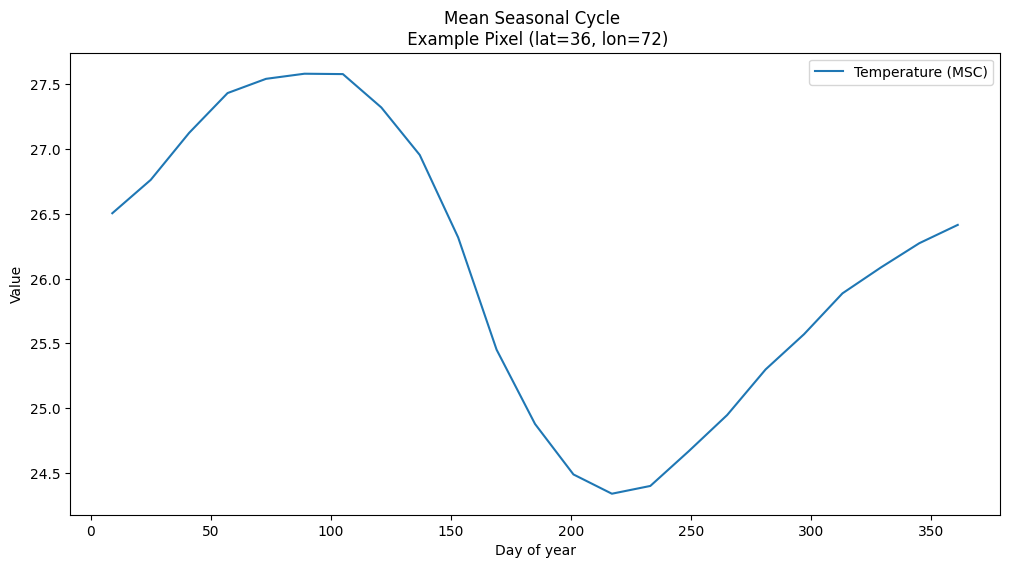

In [60]:
plt.figure(figsize=(12,6))
plt.plot(example_pixel_temp.dayofyear, example_pixel_temp, label="Temperature (MSC)")
plt.xlabel("Day of year")
plt.ylabel("Value")
plt.title("Mean Seasonal Cycle \n Example Pixel (lat=36, lon=72)")
plt.legend()
plt.show()

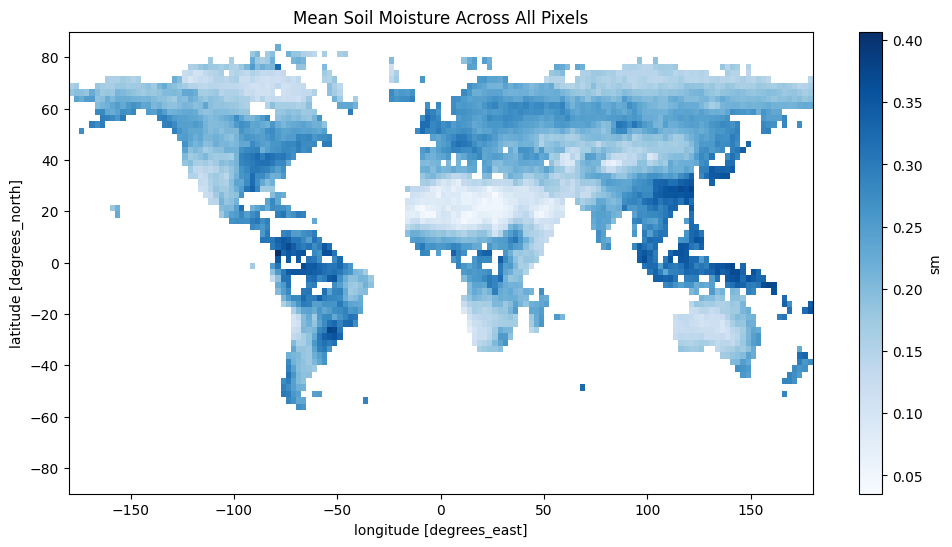

In [61]:
## soil moisture problem:
msc_sm = ds.sm.groupby("time.dayofyear").mean(skipna=True)
mean_sm = msc_sm.mean(dim="dayofyear")

plt.figure(figsize=(12, 6))
mean_sm.plot(cmap="Blues", add_colorbar=True)
plt.title("Mean Soil Moisture Across All Pixels")
plt.show()

In [62]:
print(ds.sm.min().values, ds.sm.max().values)
print(ds.gross_primary_productivity.min().values, ds.gross_primary_productivity.max().values)



0.0 0.68009454
-0.4970202 11.491473


## Find the maximum GPP value in the MSC at each pixel

... plot a map with these maximal GPP values (check e.g. the .max() function)

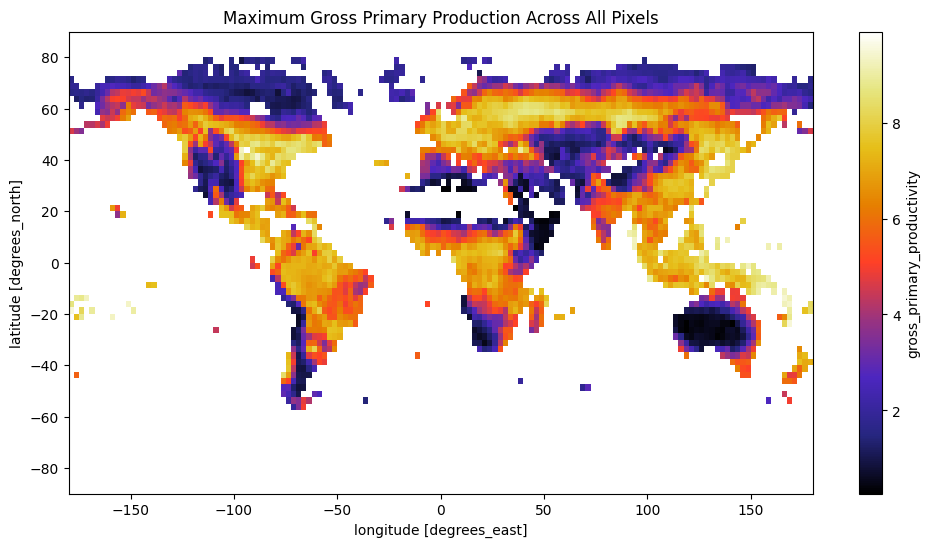

In [63]:
max_gpp= msc_gpp.max(dim="dayofyear")

plt.figure(figsize=(12, 6))
max_gpp.plot(cmap="CMRmap", add_colorbar=True)
plt.title("Maximum Gross Primary Production Across All Pixels")
plt.show()

## Find out the day of year (DOY) of maximum GPP at each pixel (check .idxmax() function)
...This is your mask to determine temperature and soil moisture at DOY of maximum GPP (it has the same set of values as the dayofyear axis, so you can use it to filter). Plot a map of DOY of maximum GPP to check out the data.

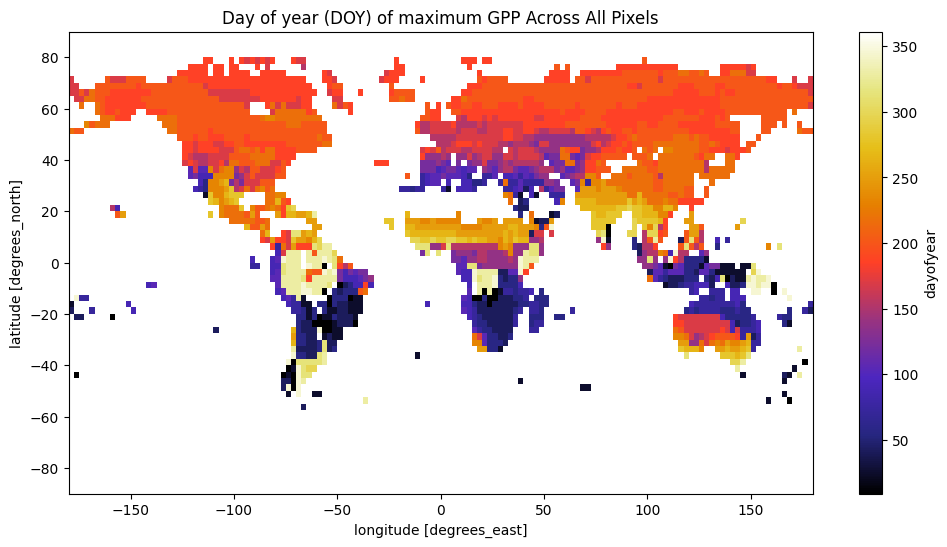

In [88]:
idmax_gpp= msc_gpp.idxmax(dim="dayofyear")
plt.figure(figsize=(12, 6))
idmax_gpp.plot(cmap="CMRmap", add_colorbar=True)
plt.title("Day of year (DOY) of maximum GPP Across All Pixels")
plt.show()

## For mean annual temperature and mean annual soil moisture, find their values at DOY of maximum GPP 

... (use e.g. x.where(x['dayofyear'] == mask) to mask all data except the corresponding value at DOY of maximum GPP, where x is your xarray). It helps to look at a timeseries at one pixel to understand what is happening. You then need to aggregate by .max('dayofyear', skipna=True) to only retain the one value which is not masked to NaN at each pixel (dropping the dayofyear axis, so you now have a map with lan/lon dimensions only).

In [70]:
msc_gpp

<xarray.DataArray 'gross_primary_productivity' (dayofyear: 23, lat: 72, lon: 144)>
dask.array<stack, shape=(23, 72, 144), dtype=float32, chunksize=(1, 72, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float64 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8
  * dayofyear  (dayofyear) int64 9 25 41 57 73 89 ... 281 297 313 329 345 361
Attributes: (12/25)
    acknowledgment:             FLUXCOM
    date_modified:              2022-10-17 22:14:30.401506
    description:                FLUXCOM
    geospatial_lat_max:         89.87499928049999
    geospatial_lat_min:         -89.8750000005
    geospatial_lat_resolution:  0.25
    ...                         ...
    standard_name:              gross_primary_productivity_of_carbon
    temporal_resolution:        8D
    time_coverage_end:          2020-12-30T00:00:00.000000000
    time_coverage_start:        2001-01-05T00:00:00.000000000
    time_period:                8D
    units:                      g C m^-2 d^-1

In [69]:
doy_max_gpp = m.max(dim="dayofyear").compute()
doy_max_gpp

<xarray.DataArray 'gross_primary_productivity' (lat: 72, lon: 144)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float64 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8

In [90]:
idmax_gpp= msc_gpp.idxmax(dim="dayofyear")
doy_gpp_msc_temp = msc_temp.where(msc_temp['dayofyear'] == idmax_gpp) 
doy_gpp_msc_sm = msc_sm.where(msc_sm['dayofyear'] == idmax_gpp) 



In [92]:
#aggregate to retain the non-masked value
final_temp = doy_gpp_msc_temp.max(dim="dayofyear", skipna=True)
final_sm = doy_gpp_msc_sm.max(dim="dayofyear", skipna=True)


Text(0.5, 1.0, 'Mean Soil Moisture at DOY of Maximun GPP')

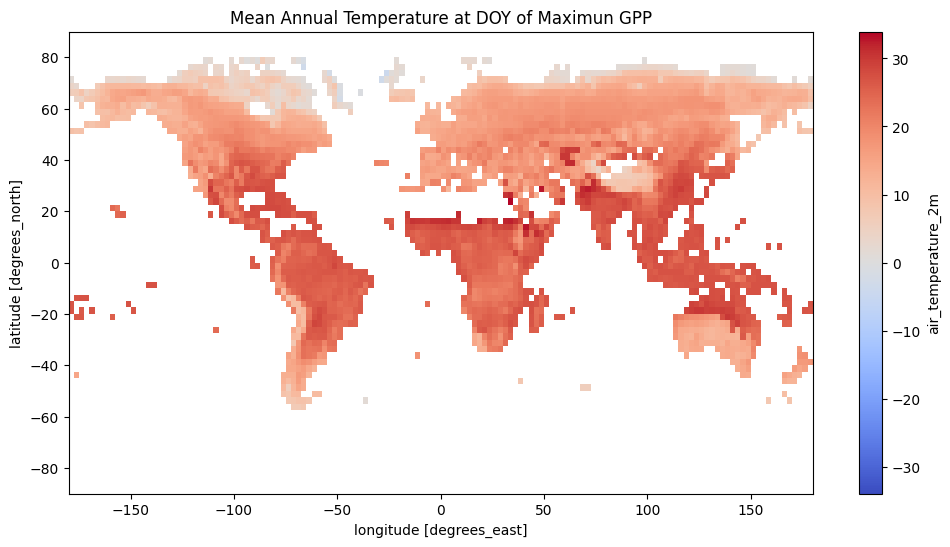

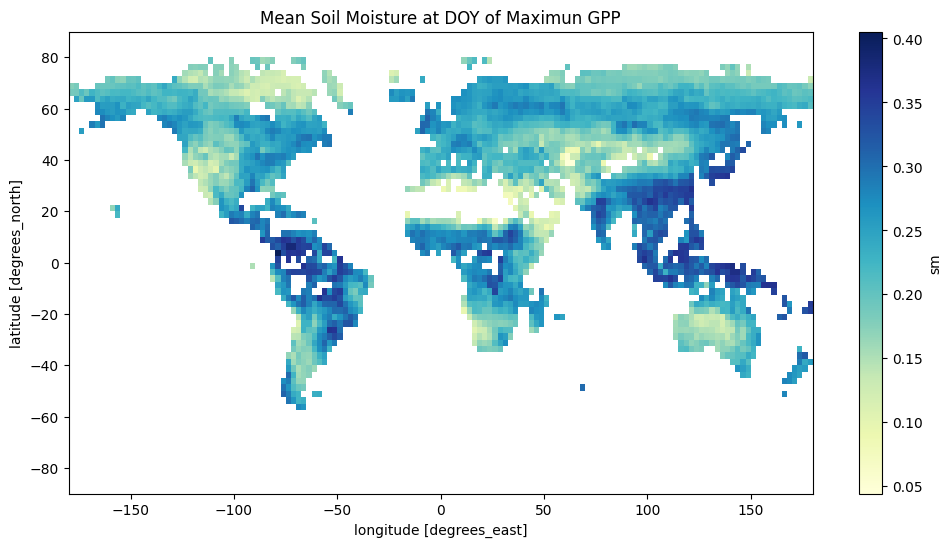

In [94]:
#final plot 
plt.figure(figsize=(12,6))
final_temp.plot(cmap="coolwarm", add_colorbar=True)
plt.title("Mean Annual Temperature at DOY of Maximun GPP")

plt.figure(figsize=(12, 6))
final_sm.plot(cmap='YlGnBu', add_colorbar=True)
plt.title("Mean Soil Moisture at DOY of Maximun GPP")

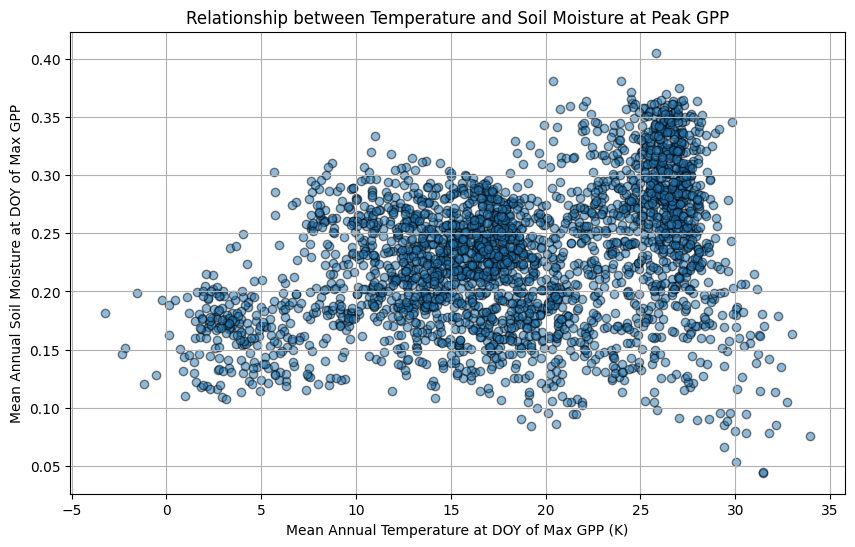

In [95]:
#scatter plot to see how temperature and soil moisture are related with
#maximun GPP

temp_values = final_temp.values.flatten()
sm_values = final_sm.values.flatten()

#remove nan values for both variables
mask = ~np.isnan(temp_values) & ~np.isnan(sm_values)
temp_clean = temp_values[mask]
sm_clean = sm_values[mask]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(temp_clean, sm_clean, alpha=0.5, edgecolor='k')
plt.xlabel("Mean Annual Temperature at DOY of Max GPP (K)")
plt.ylabel("Mean Annual Soil Moisture at DOY of Max GPP")
plt.title("Relationship between Temperature and Soil Moisture at Peak GPP")
plt.grid(True)
plt.show()

- The scatter plot expose a smothed linear correlation between the variables
- There are three areas with a dense concentration of data points
- The areas with concentration of points can be identified as:
     - Lower temperatures, $[0, 5)^{o}C$
     - Medium temperatures, $[10, 20)^{o}C$
     - High temperatures, $[25, 30]^{o}C$
- This distribution of values allows us to reflect that these correlations might follow a type of seasonal pattern

## Determine if these values are larger/smaller than the average temperature and soil moisture at each pixel
...(You can calculate their averages from the MSC cubes from step 1 with .mean(), to lower computation cost)

In [97]:
## compare values at DOY of Maximum GPP of MSC values
temp_comparison = final_temp > msc_temp
#print(temp_comparison)
sm_comparison = final_sm > msc_sm

In [98]:
# count pizels above/below avg
num_higher_temp = temp_comparison.sum().values
num_lower_temp = (~temp_comparison).sum().values
num_higher_sm = sm_comparison.sum().values
num_lower_sm = (~sm_comparison).sum().values

In [99]:
# Print the results
print(f"Number of pixels where temperature at max GPP is higher than average: {num_higher_temp}")
print(f"Number of pixels where temperature at max GPP is lower than average: {num_lower_temp}")
print(f"Number of pixels where soil moisture at max GPP is higher than average: {num_higher_sm}")
print(f"Number of pixels where soil moisture at max GPP is lower than average: {num_lower_sm}")

Number of pixels where temperature at max GPP is higher than average: 51257
Number of pixels where temperature at max GPP is lower than average: 187207
Number of pixels where soil moisture at max GPP is higher than average: 35062
Number of pixels where soil moisture at max GPP is lower than average: 203402


In [129]:
# Simulating the difference between temperature and soil moisture at DOY of max GPP and their average
temp_diff = final_temp - msc_temp 
sm_diff = final_sm - msc_sm  


**Classification based on the difference:**
- Class 1: Higher temp, higher soil moisture
- Class 2: Higher temp, lower soil moisture
- Class 3: Lower temp, higher soil moisture
- Class 4: Lower temp, lower soil moisture

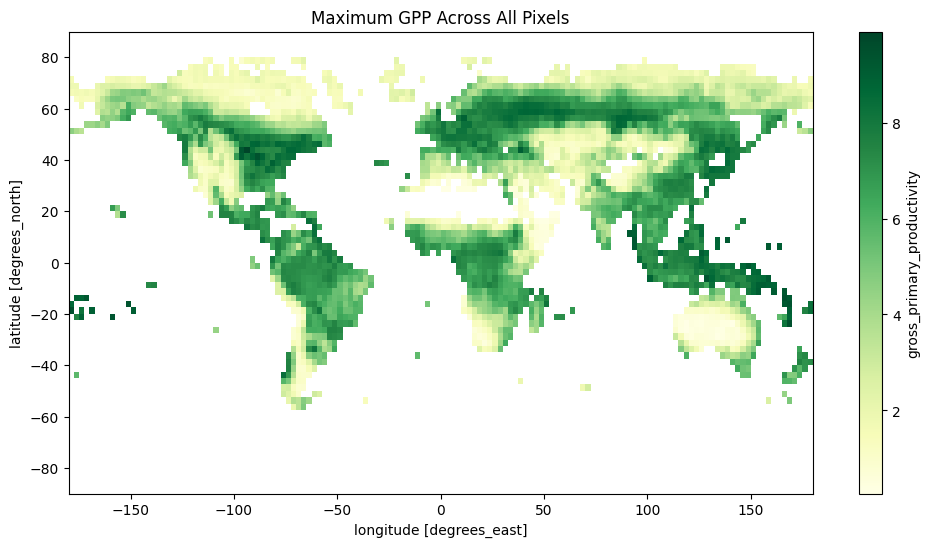

In [111]:
classification = xr.where(
    (temp_diff > 0) & (sm_diff > 0), 1,  # Higher temp and higher soil moisture
    xr.where(
        (temp_diff > 0) & (sm_diff <= 0), 2,  # Higher temp and lower soil moisture
        xr.where(
            (temp_diff <= 0) & (sm_diff > 0), 3,  # Lower temp and higher soil moisture
            4  # Lower temp and lower soil moisture
        )
    )
)

# Plot the maximum GPP map
plt.figure(figsize=(12, 6))
max_gpp.plot(cmap="YlGn", add_colorbar=True)
plt.title("Maximum GPP Across All Pixels")
plt.show()


In [112]:
classification

<xarray.DataArray (lat: 72, lon: 144, dayofyear: 23)>
dask.array<where, shape=(72, 144, 23), dtype=int64, chunksize=(72, 144, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float64 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8
  * dayofyear  (dayofyear) int64 9 25 41 57 73 89 ... 281 297 313 329 345 361

In [122]:
print(temp_diff.min().values, temp_diff.max().values)
print(sm_diff.min().values, sm_diff.max().values)


-23.95262 59.143486
-0.18098153 0.23257232


In [123]:
classification = xr.where(
    (temp_diff > 0) & (sm_diff > 0), 1,
    xr.where(
        (temp_diff > 0) & (sm_diff <= 0), 2,
        xr.where(
            (temp_diff <= 0) & (sm_diff > 0), 3,
            4
        )
    )
)
print(classification.max(dim="dayofyear").values)
print(np.unique(classification))


[[4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]
 ...
 [4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]]
[1 2 3 4]


In [120]:
#check classification attributes
print(classification.dims)
print(classification.coords)
classification.coords['lat'] = ds.lat
classification.coords['lon'] = ds.lon


('lat', 'lon', 'dayofyear')
Coordinates:
  * lat        (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float64 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8
  * dayofyear  (dayofyear) int64 9 25 41 57 73 89 ... 281 297 313 329 345 361


In [126]:
classification_2d = classification.isel(dayofyear=10)  # Example for DOY 10


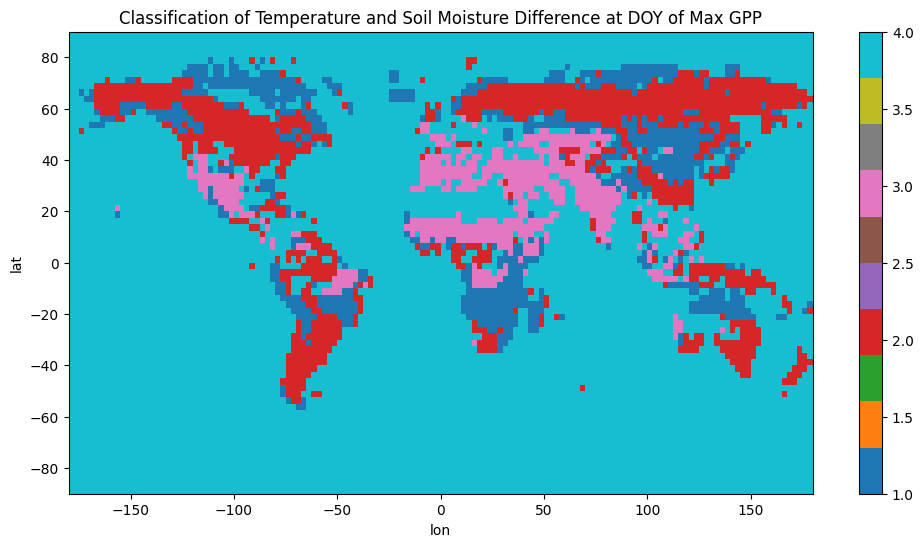

In [127]:
plt.figure(figsize=(12, 6))
classification_2d.plot(cmap="tab10", add_colorbar=True)
plt.title("Classification of Temperature and Soil Moisture Difference at DOY of Max GPP")
plt.show()


### Conclusions Classification
- The ocean which corresponds to Class 4: Lower temp, lower soil moisture, is well visualized on the map, covering the background
- In the case of Class 3: Lower temp, higher soil moisture. Regions such as Africa and Europe are marked in this range
- Higher and lower latitudes are represented in the Class 2: Lower temp, higher soil moisture
- Finally, regions on the intertropical convergence zone are classified in Class 1: Higher temp, higher soil moisture
